In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "./data/movielens_100k/"

Check movies.csv for formatting, number of movies, and genres.

In [2]:
movies = pd.read_csv(path + "movies.csv")

Check for proper loading of movie titles with a ',' in it.

In [3]:
print(movies.iloc[10])

movieId                                11
title      American President, The (1995)
genres               Comedy|Drama|Romance
Name: 10, dtype: object


Get the number of unique movie IDs

In [4]:
print(len(pd.unique(movies['movieId'])))

9742


In [5]:
print(movies.shape)

(9742, 3)


Get the unique movie generes and a count for each.

In [6]:
genres = {}

for i in range(movies.shape[0]):
    temp = movies.iloc[i]['genres']
    
    for item in temp.split('|'):
        if item in genres.keys():
            genres[item] = genres[item] + 1
        else:
            genres[item] = 1

print("Num Genres: {0}\n".format(len(genres.keys())))

for key, count in genres.items():
    print("{0}: {1}".format(key, count))

Num Genres: 20

Adventure: 1263
Animation: 611
Children: 664
Comedy: 3756
Fantasy: 779
Romance: 1596
Drama: 4361
Action: 1828
Crime: 1199
Thriller: 1894
Horror: 978
Mystery: 573
Sci-Fi: 980
War: 382
Musical: 334
Documentary: 440
IMAX: 158
Western: 167
Film-Noir: 87
(no genres listed): 34


Check ratings.csv for userId, movieId, and rating.

In [7]:
ratings = pd.read_csv(path + "ratings.csv")

In [8]:
print(ratings.head())
print("\nRatings Shape")
print(ratings.shape)

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Ratings Shape
(100836, 4)


Get number of unique users.

In [9]:
print(len(pd.unique(ratings['userId'])))

610


Get the number of ratings generated by each user and display plot.

In [10]:
users = {}

for i in range(ratings.shape[0]):
    if ratings.iloc[i]['userId'] in users.keys():
        users[ratings.iloc[i]['userId']] = users[ratings.iloc[i]['userId']] + 1
    else:
        users[ratings.iloc[i]['userId']] = 1

print("Num Users: {0}\n".format(len(users.keys())))

for key, count in users.items():
    print("{0}: {1}".format(key, count))

Num Users: 610

1.0: 232
2.0: 29
3.0: 39
4.0: 216
5.0: 44
6.0: 314
7.0: 152
8.0: 47
9.0: 46
10.0: 140
11.0: 64
12.0: 32
13.0: 31
14.0: 48
15.0: 135
16.0: 98
17.0: 105
18.0: 502
19.0: 703
20.0: 242
21.0: 443
22.0: 119
23.0: 121
24.0: 110
25.0: 26
26.0: 21
27.0: 135
28.0: 570
29.0: 81
30.0: 34
31.0: 50
32.0: 102
33.0: 156
34.0: 86
35.0: 23
36.0: 60
37.0: 21
38.0: 78
39.0: 100
40.0: 103
41.0: 217
42.0: 440
43.0: 114
44.0: 48
45.0: 399
46.0: 42
47.0: 140
48.0: 33
49.0: 21
50.0: 310
51.0: 359
52.0: 130
53.0: 20
54.0: 33
55.0: 25
56.0: 46
57.0: 476
58.0: 112
59.0: 107
60.0: 22
61.0: 39
62.0: 366
63.0: 271
64.0: 517
65.0: 34
66.0: 345
67.0: 36
68.0: 1260
69.0: 46
70.0: 62
71.0: 35
72.0: 45
73.0: 210
74.0: 177
75.0: 69
76.0: 119
77.0: 29
78.0: 61
79.0: 64
80.0: 167
81.0: 26
82.0: 227
83.0: 118
84.0: 293
85.0: 34
86.0: 70
87.0: 21
88.0: 56
89.0: 518
90.0: 54
91.0: 575
92.0: 24
93.0: 97
94.0: 56
95.0: 168
96.0: 78
97.0: 36
98.0: 92
99.0: 53
100.0: 148
101.0: 61
102.0: 56
103.0: 377
104.0: 273
10

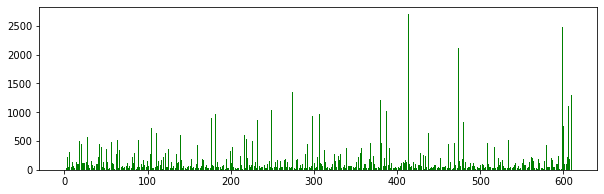

In [11]:
plt.figure(figsize=(10,3))
plt.bar(list(users.keys()), users.values(), color = 'g')
plt.show()

In [13]:
users_df = pd.DataFrame(users.items(), columns=['user', 'count'])

print("Statistics for the number of reviews of each user.\n")
print(users_df['count'].describe())

Statistics for the number of reviews of each user.

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: count, dtype: float64


Get the average rating for each movie.

In [30]:
movie_ratings = ratings.groupby(['movieId'])['rating'].mean()

movie_ratings = movie_ratings.to_frame().reset_index()

print(movie_ratings.head())

   movieId    rating
0        1  3.920930
1        2  3.431818
2        3  3.259615
3        4  2.357143
4        5  3.071429
